# Yellow Report PID Performance Evaluation

The codes presented here are not officially sanctioned code.

Nonetheless, for PID, there will be a requirement that all detector technologies
shall present performance plots via code so that an apples-to-apples comparison
is possible.

This example will allow groups to get started immediately with code that would require
minimal future updates when an official formulation becomes available.  The code here is how you 
REPORT the fundings of your simulations...not how you acquire them.

Here is how to run this simple example:

```
[me@computer] root -l
root [0] .x RUNME.C
```

If you want to develop your own detector, it is basically like this:

1.  `Copy tofBarrel.h <yourThing>.h`
2.  `Copy tofBarrel.C <yourthing>.C`
3.  Edit these files to make them correct:
    - search and replace tofBarrel with <yourThing>  
    - change every routine until to gives answers for your detector technology.
4.  A few requests to help your colleagues:
    - use variable names that are meaningful (particularly in the constructor).  
    - put reasonable default values for all arguments in the constructor.
    - If there is some critical value (tof res, index of refraction) put this in the name string.
    - comments in the code can include:
      - comments to help understand how it is coded.
      - comments to summarize assumptions in the present version.
      - comments to reference source of information


In [1]:
#include "tofBarrel.C"

In [2]:
std::vector<PID*> Detectors;
std::vector<TH1*> Plots;

PID::type   myType = PID::pi_k;  // This means I want to plot the pi_K separation;
double    numSigma = 3.0;        // This means I want to plot teh contour for three sigma separation


In [3]:

  //  Add as many detectors as your heart desires....
  Detectors.push_back( new tofBarrel(150, -1, 1,  5) ); //  5 psec @ 150 cm
  Detectors.push_back( new tofBarrel(100, -1, 1, 10) ); // 10 psec @ 100 cm
  Detectors.push_back( new tofBarrel(100, -1, 1, 20) ); // 20 psec @ 100 cm
  

In [4]:
  //  Select the booking criterion for the performance plot.
  TH1* Performance = new TH1D("Performance","Performance",100,-6,6);  // Format for detector Performance.

At least in the beginning, you might not want to change the lines below here...


In [5]:
// Now we call upon all detectors to present their descriptions and assumptions.
  for (int i=0; i<Detectors.size(); i++)
    {
      Detectors[i]->description();
    }

  // Now we clone the original performance plot once for every known detector.
  for (int i=0; i<Detectors.size(); i++)
    {
      Plots.push_back( (TH1*)Performance->Clone(Detectors[i]->name().c_str()) );
      Plots[i]->SetLineColor(i+1);  // Works well only for the first 9 colors...
      Plots[i]->SetLineWidth(4);
   }
  
  // Now we fill all the performance plots:
  for (int i=1; i<Plots[0]->GetNbinsX(); i++) // Remember root is weird...bin0 is the underflow bin
    {
      double eta = Plots[0]->GetBinCenter(i);
      for (int j=0; j<Detectors.size(); j++)
	{
	  if (Detectors[j]->valid(eta, 1.0))
	    {
	      Plots[j]->SetBinContent(i, Detectors[j]->maxP(eta, numSigma, myType) ); 
	    }
	}
    }

My name is "TOF barrel R=150 dT=5" and I am described as follows:
    I am a Time-of-Flight barrel.
    I extend from eta =  -1 until eta = 1 .
    I am located at radius R= 150 cm.
    I have a time resolution of 5 picoseconds.
    My calculations have assumed perfect momentum resolution and pointing.
    My calculations have assumed purely Gaussian time response.

My name is "TOF barrel R=100 dT=10" and I am described as follows:
    I am a Time-of-Flight barrel.
    I extend from eta =  -1 until eta = 1 .
    I am located at radius R= 100 cm.
    I have a time resolution of 10 picoseconds.
    My calculations have assumed perfect momentum resolution and pointing.
    My calculations have assumed purely Gaussian time response.

My name is "TOF barrel R=100 dT=20" and I am described as follows:
    I am a Time-of-Flight barrel.
    I extend from eta =  -1 until eta = 1 .
    I am located at radius R= 100 cm.
    I have a time resolution of 20 picoseconds.
    My calculations have assu

## Make the plot

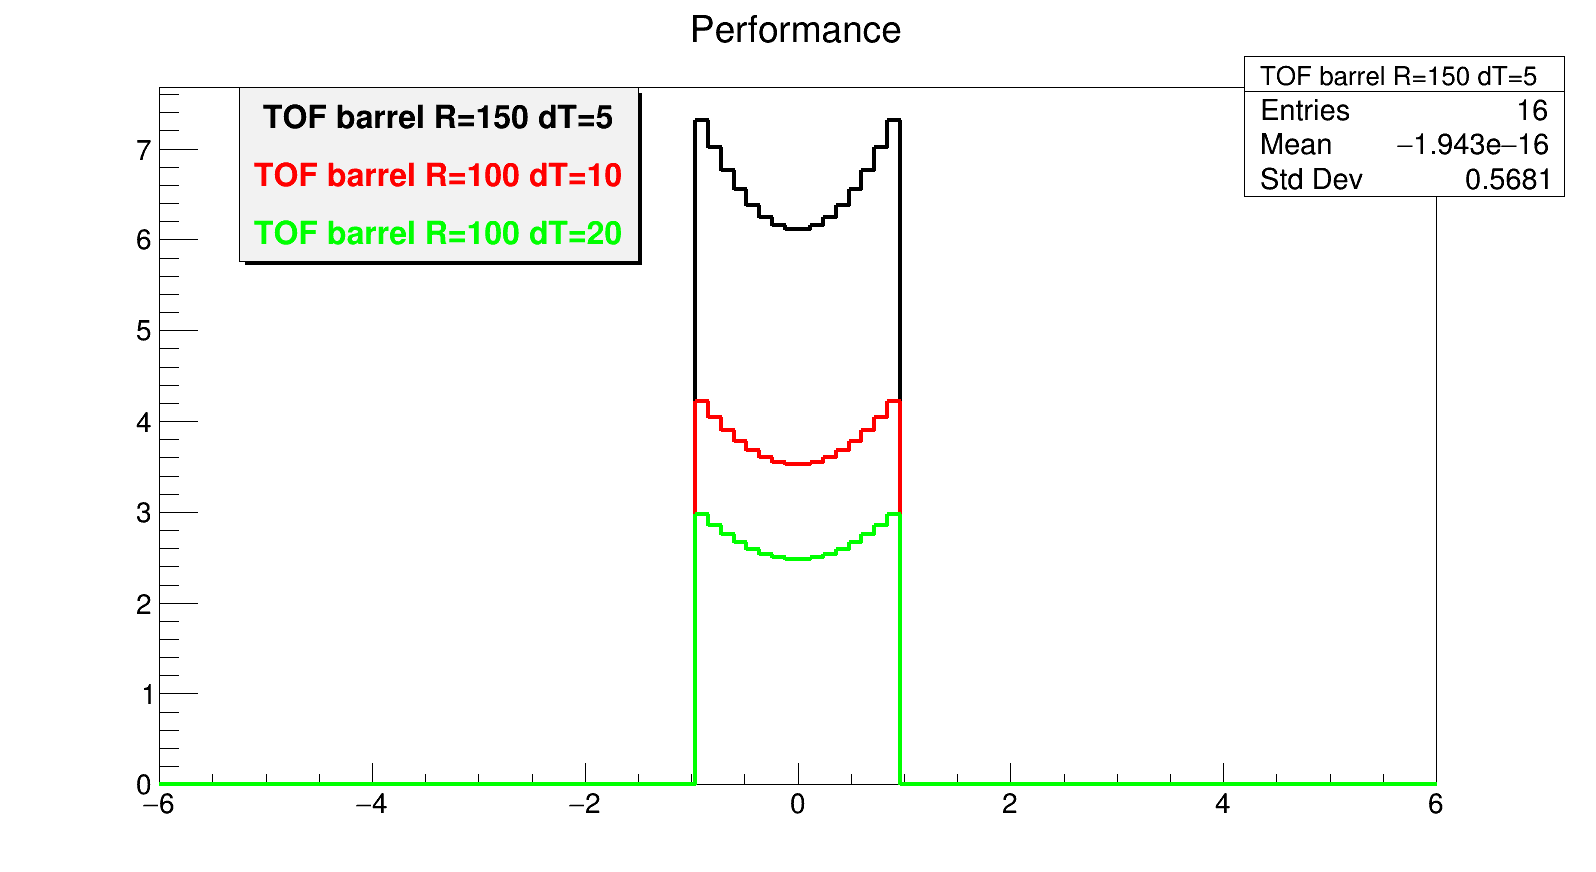

In [6]:
{
    
  TCanvas *c1 = new TCanvas("c1","c1",1600,900);
  // Now we display the performance plots
  for (int i=0; i<Plots.size(); i++)
    {
      Plots[i]->Draw("same");
    }

  //  Now we put colored names on top of the plot (too fancy?)...
  TPaveText *pt = new TPaveText(0.15,0.7,0.4,0.90,"NDC");
  for (int i=0; i<Detectors.size(); i++)
    {
      pt->AddText( Detectors[i]->name().c_str() ); 
      ((TText*)pt->GetListOfLines()->Last())->SetTextColor(i+1);
    }
  pt->Draw();
    
  c1 -> Draw();
}